In [2]:
!unzip dataset.zip

Archive:  dataset.zip
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Move the files to a specific folder in Google Drive
!mv /content/train-images-idx3-ubyte '/content/drive/My Drive/Colab Notebooks/'
!mv /content/train-labels-idx1-ubyte '/content/drive/My Drive/Colab Notebooks/'
!mv /content/t10k-images-idx3-ubyte '/content/drive/My Drive/Colab Notebooks/'
!mv /content/t10k-labels-idx1-ubyte '/content/drive/My Drive/Colab Notebooks/'


In [ ]:
aaaqa

 1.K Nearest Neighbour

In [3]:
import numpy as np
import pickle
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Define functions to load the dataset
def load_images(filename):
    with open(filename, 'rb') as file:
        data = np.frombuffer(file.read(), dtype=np.uint8, offset=16)
    return data.reshape(-1, 28 * 28)

def load_labels(filename):
    with open(filename, 'rb') as file:
        data = np.frombuffer(file.read(), dtype=np.uint8, offset=8)
    return data

# Load the dataset
train_img = load_images('train-images-idx3-ubyte')
train_labels = load_labels('train-labels-idx1-ubyte')
test_img = load_images('t10k-images-idx3-ubyte')
test_labels = load_labels('t10k-labels-idx1-ubyte')

# Features
X = train_img

# Labels
y = train_labels

# Prepare Classifier Training and Validation Data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1)

# KNN Classifier with n_neighbors = 5, algorithm = auto, n_jobs = 10
clf = KNeighborsClassifier(n_neighbors=5, algorithm='auto', n_jobs=10)
clf.fit(X_train, y_train)

# Pickle the Classifier for Future Use
with open('MNIST_KNN.pickle', 'wb') as f:
    pickle.dump(clf, f)

# Load the trained classifier
pickle_in = open('MNIST_KNN.pickle', 'rb')
clf = pickle.load(pickle_in)
# Load the test dataset
test_img = load_images('t10k-images-idx3-ubyte')
test_labels = load_labels('t10k-labels-idx1-ubyte')


# Calculating Accuracy of trained Classifier
confidence = clf.score(X_test, y_test)

# Making Predictions on Validation Data
y_pred = clf.predict(X_test)
# Making Predictions on Test Input Images
test_labels_pred = clf.predict(test_img)

# Calculating Accuracy of Predictions
accuracy = accuracy_score(y_test, y_pred)

# Calculating Accuracy of Trained Classifier on Test Data
test_accuracy = accuracy_score(test_labels, test_labels_pred)

# Creating Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Print results
print('KNN Trained Classifier Confidence: ', confidence)
print('Accuracy of Classifier on Validation Image Data: ', accuracy)
print('Accuracy of Classifier on Test Images: ', test_accuracy)
print('Confusion Matrix: \n', conf_mat)


KNN Trained Classifier Confidence:  0.974
Accuracy of Classifier on Validation Image Data:  0.974
Accuracy of Classifier on Test Images:  0.9687
Confusion Matrix: 
 [[589   1   0   0   1   0   4   0   0   0]
 [  0 699   1   0   1   0   0   2   0   0]
 [  2   9 585   1   1   0   0   4   3   0]
 [  1   4   8 565   0   5   0   4   5   3]
 [  0   7   0   1 570   0   2   1   0  12]
 [  1   0   1   6   0 522   4   0   1   1]
 [  1   2   0   0   0   4 603   0   0   0]
 [  1   4   2   0   0   0   0 634   0   3]
 [  0   9   0   5   5   4   2   2 519   5]
 [  0   2   1   0   2   1   1   1   2 558]]


2.SVM

In [4]:
import numpy as np
import pickle
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix


# Train the SVM classifier with your chosen parameters
clf = svm.SVC(gamma=0.1, kernel='poly')
clf.fit(X_train, y_train)

# Save the trained SVM classifier
with open('MNIST_SVM.pickle', 'wb') as f:
    pickle.dump(clf, f)


# SVM Classifier with your chosen parameters
print('\nSVM Classifier with gamma = 0.1; Kernel = polynomial')

# Load the trained SVM classifier
with open('MNIST_SVM.pickle', 'rb') as f:
    clf = pickle.load(f)

# Calculate Accuracy of trained Classifier on the validation data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Create Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

print('\nSVM Trained Classifier Accuracy: ', accuracy)
print('\nConfusion Matrix: \n', conf_mat)

# Calculate Accuracy of Trained Classifier on the test data
test_labels_pred = clf.predict(test_img)
test_accuracy = accuracy_score(test_labels, test_labels_pred)

print('\nAccuracy of Classifier on Test Images: ', test_accuracy)



SVM Classifier with gamma = 0.1; Kernel = polynomial

SVM Trained Classifier Accuracy:  0.9785

Confusion Matrix: 
 [[587   0   0   0   1   1   4   1   0   1]
 [  0 697   2   1   1   0   0   1   1   0]
 [  4   2 598   0   0   0   0   1   0   0]
 [  1   1   8 571   0   3   0   3   7   1]
 [  0   1   1   0 579   0   2   3   1   6]
 [  0   2   1   2   0 524   2   0   2   3]
 [  1   2   2   0   2   4 598   0   1   0]
 [  2   0   3   0   2   1   0 633   0   3]
 [  1   3   2   4   4   3   1   0 529   4]
 [  0   1   0   0   6   3   0   2   1 555]]

Accuracy of Classifier on Test Images:  0.9781


**3.Random Forest Classifier**

In [5]:
import sys
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Train the Random Forest Classifier with your chosen parameters
clf = RandomForestClassifier(n_estimators=100, n_jobs=10)
clf.fit(X_train, y_train)

# Save the trained Random Forest Classifier
with open('MNIST_RFC.pickle', 'wb') as f:
    pickle.dump(clf, f)

# Random Forest Classifier with your chosen parameters
print('\nRandom Forest Classifier with n_estimators = 100, n_jobs = 10')

# Load the trained Random Forest classifier
with open('MNIST_RFC.pickle', 'rb') as f:
    clf = pickle.load(f)

# Calculate Accuracy of trained Classifier on the validation data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Create Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

print('\nRFC Trained Classifier Confidence: ', confidence)
print('\nAccuracy of Classifier on Validation Image Data: ', accuracy)
print('\nConfusion Matrix: \n', conf_mat)

# Calculate Accuracy of Trained Classifier on the test data
test_labels_pred = clf.predict(test_img)
test_accuracy = accuracy_score(test_labels, test_labels_pred)

print('\nAccuracy of Classifier on Test Images: ', test_accuracy)



Random Forest Classifier with n_estimators = 100, n_jobs = 10

RFC Trained Classifier Confidence:  0.974

Accuracy of Classifier on Validation Image Data:  0.9705

Confusion Matrix: 
 [[586   0   1   0   1   0   3   0   4   0]
 [  0 694   2   3   1   0   0   1   1   1]
 [  2   2 593   3   2   0   0   2   1   0]
 [  3   0  11 558   0   6   2   5   7   3]
 [  1   0   0   0 574   0   3   0   2  13]
 [  1   1   2   4   0 520   2   0   5   1]
 [  2   1   2   0   1   6 595   0   3   0]
 [  2   2   4   2   1   0   0 629   1   3]
 [  2   1   2   3   5   2   1   0 531   4]
 [  1   2   1   4   5   2   1   4   5 543]]

Accuracy of Classifier on Test Images:  0.968


**CNN**

In [6]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Dense

class CNN:
    @staticmethod
    def build(width, height, depth, total_classes, Saved_Weights_Path=None):
        # Initialize the Model
        model = Sequential()

        # First CONV => RELU => POOL Layer
        model.add(Conv2D(20, (5, 5), padding="same", input_shape=(depth, height, width)))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), data_format="channels_first"))

        # Second CONV => RELU => POOL Layer
        model.add(Conv2D(50, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), data_format="channels_first"))

        # Third CONV => RELU => POOL Layer
        model.add(Conv2D(100, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), data_format="channels_first"))

        # FC => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))

        # Output layer using Softmax Classifier
        model.add(Dense(total_classes))
        model.add(Activation("softmax"))

        # If you have pre-trained weights, you can load them
        if Saved_Weights_Path is not None:
            model.load_weights(Saved_Weights_Path)


        return model


Loading MNIST Dataset...


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



 Compiling model...

Training the Model...
Epoch 1/20
493/493 [==============================] - 178s 358ms/step - loss: 0.3416 - accuracy: 0.8998
Epoch 2/20
493/493 [==============================] - 168s 341ms/step - loss: 0.0616 - accuracy: 0.9807
Epoch 3/20
493/493 [==============================] - 167s 339ms/step - loss: 0.0438 - accuracy: 0.9861
Epoch 4/20
493/493 [==============================] - 171s 348ms/step - loss: 0.0338 - accuracy: 0.9893
Epoch 5/20
493/493 [==============================] - 166s 337ms/step - loss: 0.0268 - accuracy: 0.9913
Epoch 6/20
493/493 [==============================] - 169s 344ms/step - loss: 0.0214 - accuracy: 0.9929
Epoch 7/20
493/493 [==============================] - 166s 336ms/step - loss: 0.0184 - accuracy: 0.9939
Epoch 8/20
493/493 [==============================] - 167s 339ms/step - loss: 0.0138 - accuracy: 0.9955
Epoch 9/20
493/493 [==============================] - 166s 337ms/step - loss: 0.0120 - accuracy: 0.9962
Epoch 10/20
493/493 

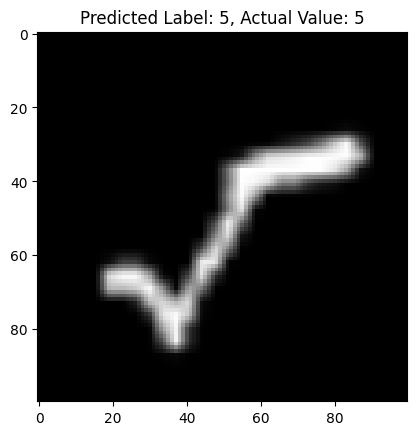

1/1 [==============================] - 0s 27ms/step


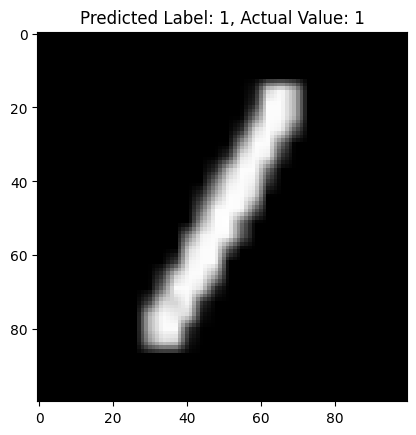

1/1 [==============================] - 0s 25ms/step


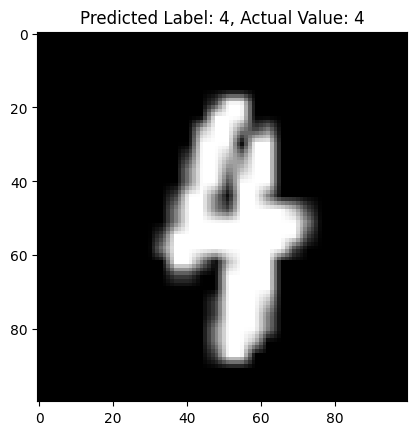

1/1 [==============================] - 0s 22ms/step


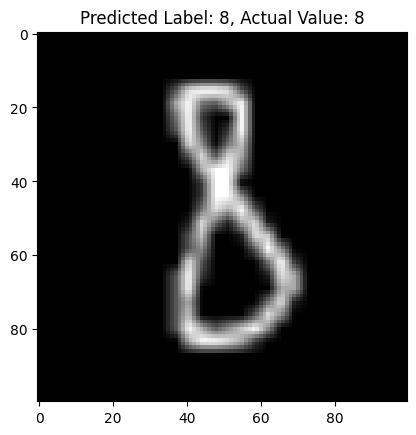

1/1 [==============================] - 0s 22ms/step


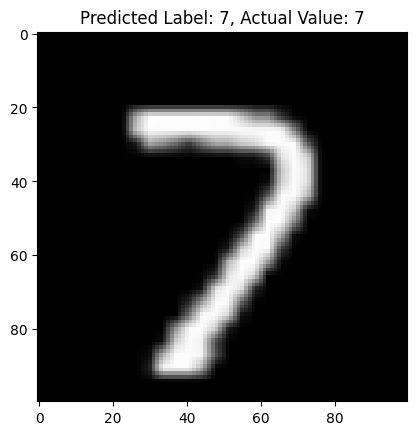

In [7]:
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense
from keras.optimizers import SGD
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

# Define a CNN class for building the model
class CNN:
    @staticmethod
    def build(width, height, depth, total_classes, Saved_Weights_Path=None):
        # Initialize the Model
        model = Sequential()

        # First CONV => RELU => POOL Layer
        model.add(Conv2D(20, (5, 5), padding="same", input_shape=(height, width, depth)))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

        # Second CONV => RELU => POOL Layer
        model.add(Conv2D(50, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

        # Third CONV => RELU => POOL Layer
        model.add(Conv2D(100, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

        # FC => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))

        # Output layer using Softmax Classifier
        model.add(Dense(total_classes))
        model.add(Activation("softmax"))

        # If you have pre-trained weights, you can load them
        if Saved_Weights_Path is not None:
            model.load_weights(Saved_Weights_Path)

        return model

# Read/Download MNIST Dataset
print('Loading MNIST Dataset...')
dataset = fetch_openml('mnist_784')

# Read the MNIST data as an array of 784 pixels and convert to 28x28 image matrix
mnist_data = dataset.data.to_numpy().reshape((dataset.data.shape[0], 28, 28))
mnist_data = mnist_data[:, :, :, np.newaxis]  # Channels last

# Divide data into testing and training sets.
train_img, test_img, train_labels, test_labels = train_test_split(
    mnist_data / 255.0, dataset.target.astype("int"), test_size=0.1
)

# Transform training and testing data to 10 classes in the range [0, classes]
total_classes = 10  # 0 to 9 labels

# Convert train_labels and test_labels to NumPy arrays and then one-hot encode the labels
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
train_labels = encoder.fit_transform(train_labels.reshape(-1, 1))
test_labels = encoder.transform(test_labels.reshape(-1, 1))

# Define and compile the SGD optimizer and CNN model
print('\n Compiling model...')
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
clf = CNN.build(
    width=28, height=28, depth=1, total_classes=10, Saved_Weights_Path=None
)
clf.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

# Training the Model
b_size = 128  # Batch size
num_epoch = 20  # Number of epochs
verb = 1  # Verbose
print('\nTraining the Model...')
clf.fit(train_img, train_labels, batch_size=b_size, epochs=num_epoch, verbose=verb)

# Evaluate accuracy and loss function of test data
print('Evaluating Accuracy and Loss Function...')
loss, accuracy = clf.evaluate(test_img, test_labels, batch_size=128, verbose=1)
print('Accuracy of Model: {:.2f}%'.format(accuracy * 100))


# Show the images using Matplotlib and make random selections.
import matplotlib.pyplot as plt

for num in np.random.choice(np.arange(0, len(test_labels)), size=(5,)):
    # Predict the label of the digit using CNN.
    probs = clf.predict(test_img[np.newaxis, num])
    prediction = probs.argmax(axis=1)

    # Resize the Image to 100x100 from 28x28 for better view.
    image = (test_img[num] * 255).astype("uint8")
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    image = cv2.resize(image, (100, 100), interpolation=cv2.INTER_LINEAR)

    plt.imshow(image, cmap="gray")
    plt.title(f'Predicted Label: {prediction[0]}, Actual Value: {np.argmax(test_labels[num])}')
    plt.show()


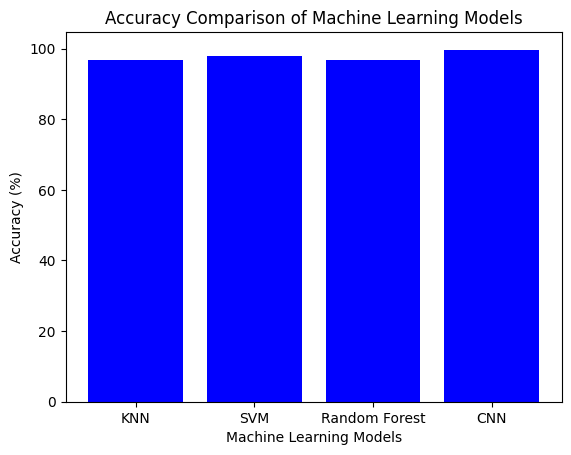

In [11]:
import matplotlib.pyplot as plt

model_names = ['KNN', 'SVM', 'Random Forest', 'CNN']
accuracies = [96.67, 97.91, 96.82, 99.70]  # Replace these values with the actual accuracies you obtained

# Create a bar chart
plt.bar(model_names, accuracies, color=['blue', 'blue', 'blue', 'blue'])

# Add labels and a title
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of Machine Learning Models')

# Display the plot
plt.show()


In [12]:
!pip install tk


In [13]:
# After training the model, save the entire model to a file
clf.save('cnn_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
import tkinter as tk
from tkinter import Canvas, Button, PhotoImage
#from keras.models import load_model
import cv2
import numpy as np

from keras.models import load_model

# Load the pre-trained CNN model
model = load_model('cnn_model.h5')


# Create a GUI window
root = tk.Tk()
root.title("Digit Recognition")

# Create a canvas for drawing digits
canvas = Canvas(root, width=200, height=200, bg="white")
canvas.pack()

# Initialize variables to store the drawn digit and prediction
drawing = False
last_x, last_y = 0, 0
image = np.zeros((200, 200), dtype=np.uint8)

# Function to start drawing
def start_drawing(event):
    global drawing
    drawing = True
    x, y = event.x, event.y
    canvas.create_oval(x - 5, y - 5, x + 5, y + 5, fill="black", width=5)
    global last_x, last_y
    last_x, last_y = x, y

# Function to stop drawing
def stop_drawing(event):
    global drawing
    drawing = False

# Function to draw while dragging the mouse
def draw(event):
    if drawing:
        x, y = event.x, event.y
        canvas.create_line(last_x, last_y, x, y, fill="black", width=5)
        last_x, last_y = x, y
        global image
        cv2.line(image, (last_x, last_y), (x, y), 255, 5)

# Function to predict the drawn digit
def predict_digit():
    # Resize the image to 28x28
    resized_image = cv2.resize(image, (28, 28))

    # Normalize and prepare the image for prediction
    test_image = resized_image / 255.0
    test_image = test_image.reshape(1, 28, 28, 1)

    # Make the prediction
    prediction = model.predict(test_image)
    predicted_digit = np.argmax(prediction)

    # Display the prediction
    result_label.config(text=f"Predicted Digit: {predicted_digit}")

# Reset the canvas
def clear_canvas():
    canvas.delete("all")
    global image
    image = np.zeros((200, 200), dtype=np.uint8)
    result_label.config(text="Predicted Digit: ")

# Create buttons and labels
draw_label = tk.Label(root, text="Draw a digit:")
draw_label.pack()
canvas.bind("<Button-1>", start_drawing)
canvas.bind("<ButtonRelease-1>", stop_drawing)
canvas.bind("<B1-Motion>", draw)

predict_button = Button(root, text="Predict Digit", command=predict_digit)
predict_button.pack()

clear_button = Button(root, text="Clear Canvas", command=clear_canvas)
clear_button.pack()

result_label = tk.Label(root, text="Predicted Digit: ")
result_label.pack()

# Run the GUI
root.mainloop()


TclError: ignored

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Assuming you have loaded and preprocessed your dataset as X_train, X_test, y_train, y_test

# Define classifiers
classifiers = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression()
}

# Train each classifier and store accuracies
accuracies = []
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append((clf_name, accuracy))

# Plotting
classifiers_names, accuracy_values = zip(*accuracies)
plt.figure(figsize=(10, 6))
plt.bar(classifiers_names, accuracy_values, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Classifier Accuracies Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: ignored

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import cv2
import numpy as np
import pickle
from keras.optimizers import SGD
from sklearn.datasets import fetch_openml
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense

# Assuming you have loaded and preprocessed your dataset as X_train, X_test, y_train, y_test
# ...

# Load the MNIST dataset
dataset = fetch_openml('mnist_784')
mnist_data = dataset.data.to_numpy().reshape((dataset.data.shape[0], 28, 28))
mnist_data = mnist_data[:, :, :, np.newaxis]  # Channels last

# Divide data into testing and training sets.
train_img, test_img, train_labels, test_labels = train_test_split(
    mnist_data / 255.0, dataset.target.astype("int"), test_size=0.1
)

# Convert train_labels and test_labels to NumPy arrays and then one-hot encode the labels
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
train_labels = encoder.fit_transform(train_labels.reshape(-1, 1))
test_labels = encoder.transform(test_labels.reshape(-1, 1))

# Create a list of models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5, algorithm='auto', n_jobs=10),
    'SVM': SVC(gamma=0.1, kernel='poly'),
    'Random Forest': RandomForestClassifier(n_estimators=100, n_jobs=10),
    'CNN1': CNN.build(width=28, height=28, depth=1, total_classes=10, Saved_Weights_Path=None),
    'CNN2': CNN.build(width=28, height=28, depth=1, total_classes=10, Saved_Weights_Path=None)
}

# Train and evaluate each model
accuracies = {}
for model_name, model in models.items():
    if 'CNN' in model_name:
        # Flatten the data for CNN models
        model.fit(train_img, train_labels, batch_size=128, epochs=20, verbose=1)
        predictions = model.predict(test_img).argmax(axis=1)
        true_labels = test_labels.argmax(axis=1)
    else:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        true_labels = y_test

    accuracy = accuracy_score(true_labels, predictions)
    accuracies[model_name] = accuracy
    print(f'{model_name} Accuracy: {accuracy}')

# Plotting
fig, ax = plt.subplots()
for model_name, accuracy in accuracies.items():
    ax.plot([model_name], [accuracy], marker='o', linestyle='-', label=model_name)

ax.set_title('Classifier Accuracies Comparison')
ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy')
ax.set_ylim([0, 1])
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


KNN Accuracy: 0.974
SVM Accuracy: 0.9785
Random Forest Accuracy: 0.967


RuntimeError: ignored

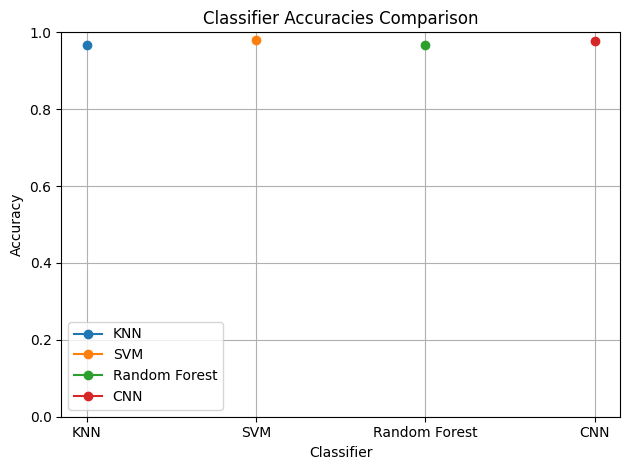

In [9]:
import matplotlib.pyplot as plt

# Assuming you have the accuracies of each model
accuracies = {
    'KNN': 0.9667,
    'SVM': 0.9791,
    'Random Forest': 0.9682,
    'CNN': 0.9770
}

# Plotting
fig, ax = plt.subplots()
for model_name, accuracy in accuracies.items():
    ax.plot([model_name], [accuracy], marker='o', linestyle='-', label=model_name)

ax.set_title('Classifier Accuracies Comparison')
ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy')
ax.set_ylim([0, 1])
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


Loading MNIST Dataset...


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



 Compiling model...
Epoch 1/20
493/493 [==============================] - 188s 378ms/step - loss: 0.3018 - accuracy: 0.9084 - val_loss: 0.0801 - val_accuracy: 0.9746
Epoch 2/20
493/493 [==============================] - 182s 369ms/step - loss: 0.0613 - accuracy: 0.9806 - val_loss: 0.0558 - val_accuracy: 0.9814
Epoch 3/20
493/493 [==============================] - 180s 366ms/step - loss: 0.0437 - accuracy: 0.9862 - val_loss: 0.0446 - val_accuracy: 0.9871
Epoch 4/20
493/493 [==============================] - 189s 383ms/step - loss: 0.0326 - accuracy: 0.9896 - val_loss: 0.0376 - val_accuracy: 0.9873
Epoch 5/20
493/493 [==============================] - 180s 366ms/step - loss: 0.0262 - accuracy: 0.9918 - val_loss: 0.0450 - val_accuracy: 0.9847
Epoch 6/20
493/493 [==============================] - 180s 364ms/step - loss: 0.0211 - accuracy: 0.9934 - val_loss: 0.0451 - val_accuracy: 0.9863
Epoch 7/20
493/493 [==============================] - 183s 372ms/step - loss: 0.0172 - accuracy: 0.9944

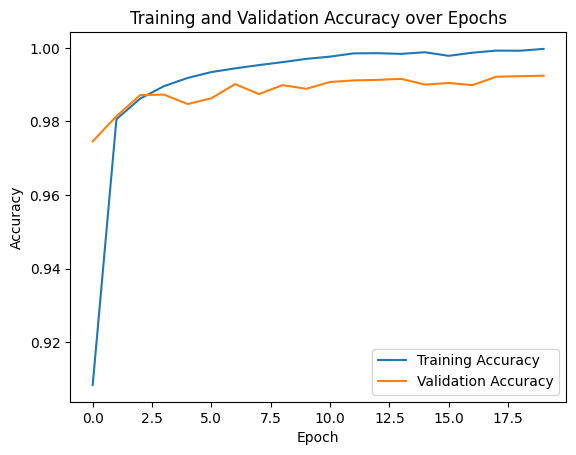

In [12]:
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense
from keras.optimizers import SGD
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Define a CNN class for building the model
class CNN:
    @staticmethod
    def build(width, height, depth, total_classes, Saved_Weights_Path=None):
        # Initialize the Model
        model = Sequential()

        # First CONV => RELU => POOL Layer
        model.add(Conv2D(20, (5, 5), padding="same", input_shape=(height, width, depth)))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

        # Second CONV => RELU => POOL Layer
        model.add(Conv2D(50, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

        # Third CONV => RELU => POOL Layer
        model.add(Conv2D(100, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

        # FC => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))

        # Output layer using Softmax Classifier
        model.add(Dense(total_classes))
        model.add(Activation("softmax"))

        # If you have pre-trained weights, you can load them
        if Saved_Weights_Path is not None:
            model.load_weights(Saved_Weights_Path)

        return model

# Read/Download MNIST Dataset
print('Loading MNIST Dataset...')
dataset = fetch_openml('mnist_784')

# Read the MNIST data as an array of 784 pixels and convert to 28x28 image matrix
mnist_data = dataset.data.to_numpy().reshape((dataset.data.shape[0], 28, 28))
mnist_data = mnist_data[:, :, :, np.newaxis]  # Channels last

# Divide data into testing and training sets.
train_img, test_img, train_labels, test_labels = train_test_split(
    mnist_data / 255.0, dataset.target.astype("int"), test_size=0.1
)

# Transform training and testing data to 10 classes in the range [0, classes]
total_classes = 10  # 0 to 9 labels

# Convert train_labels and test_labels to NumPy arrays and then one-hot encode the labels
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
train_labels = encoder.fit_transform(train_labels.reshape(-1, 1))
test_labels = encoder.transform(test_labels.reshape(-1, 1))

# Define and compile the SGD optimizer and CNN model
print('\n Compiling model...')
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
clf = CNN.build(
    width=28, height=28, depth=1, total_classes=10, Saved_Weights_Path=None
)
clf.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

# Training the Model
b_size = 128  # Batch size
num_epoch = 20  # Number of epochs
verb = 1  # Verbose

# Store the history of training for plotting
history = clf.fit(train_img, train_labels, batch_size=b_size, epochs=num_epoch, verbose=verb, validation_data=(test_img, test_labels))

# Plot training accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
